In [1]:
import pandas as pd
import numpy as np
from time import time
from poloniex import Poloniex
import matplotlib.pyplot as plt

In /home/eduardo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eduardo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eduardo/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#Criando uma instancia de Poloniex
polo = Poloniex()

In [3]:
api = Poloniex(jsonNums=float)

#period=api.DAY, start=time()-api.YEAR*10
raw = api.returnChartData('BTC_ETH', period=300, start=time()-api.MONTH*3)
df = pd.DataFrame(raw)

In [4]:
# Ajustando o formato  data e setando como index
df['date'] = pd.to_datetime(df["date"], unit='s')
df.set_index('date', inplace=True)

In [5]:
df.head()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2020-04-17 21:24:37,0.024164,0.024164,0.024164,0.024164,0.000000,0.000000,0.024164
2020-04-17 21:25:00,0.024159,0.024162,0.024158,0.024162,1.766602,0.042683,0.024161
2020-04-17 21:30:00,0.024159,0.024159,0.024159,0.024159,0.414059,0.010003,0.024159
2020-04-17 21:35:00,0.024145,0.024159,0.024145,0.024159,4.674206,0.112896,0.024153
2020-04-17 21:40:00,0.024139,0.024139,0.024138,0.024139,6.230946,0.150409,0.024139


In [6]:
df.shape

(25921, 7)

In [7]:
df.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2020-07-16 21:00:00,0.025545,0.025560,0.025545,0.025551,0.121466,0.003104,0.025557
2020-07-16 21:05:00,0.025545,0.025545,0.025545,0.025545,0.038004,0.000971,0.025545
2020-07-16 21:10:00,0.025531,0.025537,0.025512,0.025512,11.452623,0.292464,0.025537
2020-07-16 21:15:00,0.025526,0.025537,0.025512,0.025512,0.006275,0.000160,0.025521
2020-07-16 21:20:00,0.025530,0.025533,0.025512,0.025512,0.004082,0.000104,0.025518


# Retorno Simples

In [8]:
df['simpleReturn'] = (df['close']/df['close'].shift(1))-1

In [9]:
df.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage,simpleReturn
date,,,,,,,,
2020-07-16 21:00:00,0.025545,0.025560,0.025545,0.025551,0.121466,0.003104,0.025557,-0.000539
2020-07-16 21:05:00,0.025545,0.025545,0.025545,0.025545,0.038004,0.000971,0.025545,0.000000
2020-07-16 21:10:00,0.025531,0.025537,0.025512,0.025512,11.452623,0.292464,0.025537,-0.000542
2020-07-16 21:15:00,0.025526,0.025537,0.025512,0.025512,0.006275,0.000160,0.025521,-0.000196
2020-07-16 21:20:00,0.025530,0.025533,0.025512,0.025512,0.004082,0.000104,0.025518,0.000155


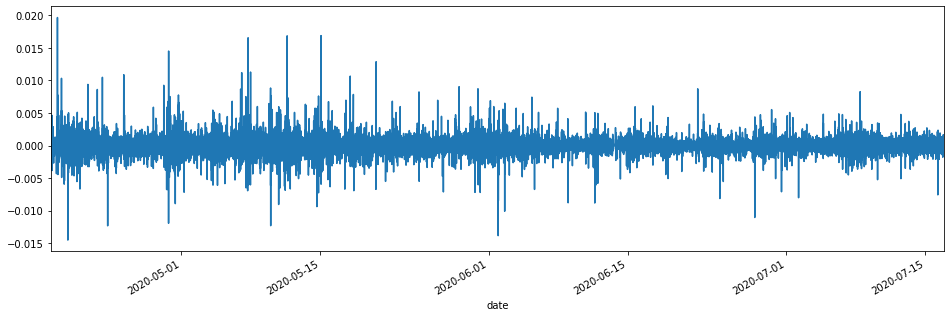

In [10]:
df['simpleReturn'].plot(figsize=(16,5));

In [11]:
df['simpleReturn'].mean()*12*24

0.0008077337226997302

# Retorno Logaritmo

In [12]:
df['logReturn'] = np.log(df['close']/df['close'].shift(1))

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df['simpleReturn'].mean()*12*24

0.0008077337226997302

In [15]:
df['logReturn'].mean()*12*24

0.0006109862703735336

# Portfolio

In [16]:
def meuPortfolio(lista, coluna = 'close'): 
    raw = api.returnChartData(lista[0], period=300, start=time()-api.MONTH*3)
    df = pd.DataFrame(raw)
    df.drop(['high', 'low', 'open', 'quoteVolume', 'volume', 'weightedAverage'], axis=1, inplace=True)
    myData = df.copy()
    myData.rename(columns={coluna:lista[0]}, inplace=True)
    nova_lista = lista[1:]
    for t in nova_lista:    
        raw = api.returnChartData(t, period=300, start=time()-api.MONTH*3)
        df = pd.DataFrame(raw)
        df.rename(columns={coluna:t}, inplace=True)
        myData = pd.merge(myData, df[[t, 'date']], on=['date'], how="inner")
    
    myData['date'] = pd.to_datetime(myData["date"], unit='s')
    myData.set_index('date', inplace=True)
    return myData

In [17]:
tickers = ['BTC_ETH', 'BTC_XRP', 'BTC_DOGE', 'BTC_XMR']
teste = meuPortfolio(tickers)

In [18]:
teste.tail()

,BTC_ETH,BTC_XRP,BTC_DOGE,BTC_XMR
date,,,,
2020-07-16 20:55:00,0.025559,0.000021,3.200000e-07,0.007333
2020-07-16 21:00:00,0.025545,0.000021,3.300000e-07,0.007334
2020-07-16 21:05:00,0.025545,0.000021,3.300000e-07,0.007326
2020-07-16 21:10:00,0.025531,0.000021,3.300000e-07,0.007335
2020-07-16 21:15:00,0.025526,0.000021,3.300000e-07,0.007346


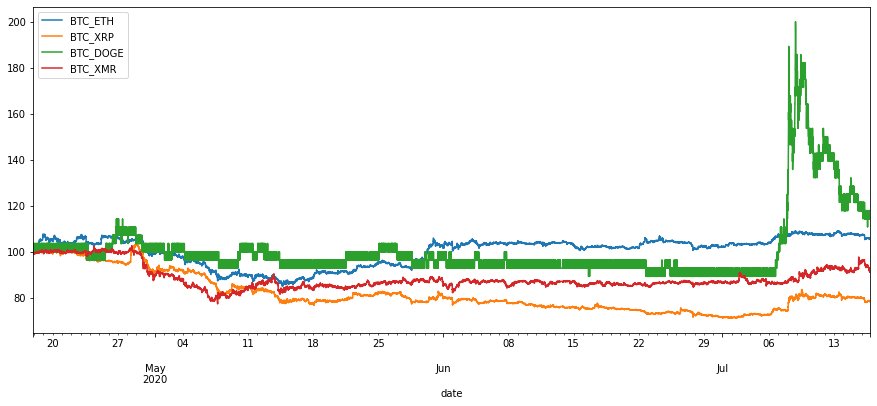

In [19]:
(teste/teste.iloc[0]*100).plot(figsize = (15,6));
plt.show()

In [20]:
retornoSimples = (teste/teste.shift(1))-1

In [21]:
retornoSimples.head()

,BTC_ETH,BTC_XRP,BTC_DOGE,BTC_XMR
date,,,,
2020-04-17 21:40:00,NaN,NaN,NaN,NaN
2020-04-17 21:45:00,-0.001708,0.001864,0.000000,-0.005697
2020-04-17 21:50:00,-0.001152,-0.000372,0.035714,0.003045
2020-04-17 21:55:00,0.001412,-0.001117,-0.034483,-0.000227
2020-04-17 22:00:00,0.000165,0.000373,0.000000,0.000455


In [22]:
pesos = [0.25, 0.25, 0.25, 0.25]

In [23]:
np.dot(retornoSimples, pesos)

array([        nan, -0.00138526,  0.00930887, ..., -0.00038953,
        0.00015768,  0.0003471 ])

In [24]:
retorno_anual = retornoSimples.mean()*12*24*365

In [25]:
retorno_anual

BTC_ETH      0.298448
BTC_XRP     -0.884743
BTC_DOGE    18.419361
BTC_XMR     -0.178366
dtype: float64

In [26]:
np.dot(retorno_anual, pesos)

4.413675018297616